# **NLP 제대로 맛보기**

네이버 영화에서 '겨울왕국1'과 '겨울왕국2'의 리뷰를 크롤링해 비교 분석해보도록 하겠습니다!

### STEP 1. TEXT CRAWLING

In [1]:
import time
from time import sleep

import selenium 
from selenium import webdriver
import random

# 버튼 로딩 기다리기 위한 모듈
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [2]:
# 겨울왕국1 영화 평점 및 리뷰 모바일 url
url_1 = "https://m.search.naver.com/search.naver?where=m&query=%EA%B2%A8%EC%9A%B8%EC%99%95%EA%B5%AD#api=%3Fwhere%3Dbridge%26ptype%3Dchi%26sm%3Digr_brg%26query%3D%25EA%25B2%25A8%25EC%259A%25B8%25EC%2599%2595%25EA%25B5%25AD%25201%26tab_prs%3Dcsa%26col_prs%3Dcsa%26nqx_theme%3D%257B%2522theme%2522%253A%257B%2522main%2522%253A%257B%2522name%2522%253A%2522movie_info%2522%252C%2522pkid%2522%253A%252268%2522%257D%257D%257D%26format%3Dtext%26tab%3Dpoint%26x_csa%3D%257B%2520%2522movieId%2522%253A%2522100931%2522%2520%252C%2522type%2522%253A%2522single%2522%2520%257D&_lp_type=cm"

In [3]:
# 겨울왕국2 영화 평점 및 리뷰 모바일 url
url_2 = "https://m.search.naver.com/search.naver?where=m&query=%EA%B2%A8%EC%9A%B8%EC%99%95%EA%B5%AD%202#api=%3Fwhere%3Dbridge%26ptype%3Dchi%26sm%3Digr_brg%26query%3D%25EA%25B2%25A8%25EC%259A%25B8%25EC%2599%2595%25EA%25B5%25AD%25202%26tab_prs%3Dcsa%26col_prs%3Dcsa%26nqx_theme%3D%257B%2522theme%2522%253A%257B%2522main%2522%253A%257B%2522name%2522%253A%2522movie_info%2522%252C%2522pkid%2522%253A%252268%2522%257D%257D%257D%26format%3Dtext%26tab%3Dpoint%26x_csa%3D%257B%2520%2522movieId%2522%253A%2522136873%2522%2520%252C%2522type%2522%253A%2522single%2522%2520%257D&_lp_type=cm"

In [11]:
def crawling_review(url, two):
    # 리뷰와 평점을 담을 리스트
    review = []
    score = []
    
    # chromedriver 위치 지정
    browser = webdriver.Chrome('C://chrome_driver/chromedriver.exe')
    browser.get(url)
    
    # 로딩하는데 걸리는 시간
    sleep(7)
    
    # 스포일러 포함 버튼 클릭
    # 겨울왕국 2의 경우에만 클릭해야 함
    if two == True:
        spoiler_button = browser.find_element_by_xpath("/html/body/layered-page/div/page-stack-view/lp-page-stack-view-template/div/page-view/div/div[2]/lp-component/component-html/div/section[2]/div/div[2]/div[3]/div/button/span[1]/span[1]")
        spoiler_button.click()
    
    for page in range(1,11):
        print("Currently on page ", page)
        
        # 긴 리뷰 텍스트 더보기 버튼 찾고 클릭
        try:
            xpath_mt = '/html/body/layered-page/div/page-stack-view/lp-page-stack-view-template/div/page-view/div/div[2]/lp-component/component-html/div/section[2]/div/div[2]/div[4]/div[1]/'
            for i in range(page):
                if i > 0:
                    xpath_mt += "div/"
            xpath_mt += "ul/li[*]/div[2]/span/button"
            more_txt = browser.find_elements_by_xpath(xpath_mt)
            for m in more_txt:
                m.click()
        # 없는 경우 pass
        except:  
            pass
        
        ## 평점 추가
        if two == True:
            xpath_s = "/html/body/layered-page/div/page-stack-view/lp-page-stack-view-template/div/page-view/div/div[2]/lp-component/component-html/div/section[2]/div/div[2]/div[4]/div[1]/div/"
        else:
            xpath_s = "/html/body/layered-page/div/page-stack-view/lp-page-stack-view-template/div/page-view/div/div[2]/lp-component/component-html/div/section[2]/div/div[2]/div[4]/div[1]/"
        for i in range(page):
            if i > 0:
                xpath_s += "div/"
        xpath_s += "ul/li[*]/div[1]/span"
        s = browser.find_elements_by_xpath(xpath_s)
        for i in s:
            score.append(i.text)
            print(i.text)
            
        ## 리뷰 추가
        if two == True:
            xpath_r = "/html/body/layered-page/div/page-stack-view/lp-page-stack-view-template/div/page-view/div/div[2]/lp-component/component-html/div/section[2]/div/div[2]/div[4]/div[1]/div/"
        else:
            xpath_r = "/html/body/layered-page/div/page-stack-view/lp-page-stack-view-template/div/page-view/div/div[2]/lp-component/component-html/div/section[2]/div/div[2]/div[4]/div[1]/"
        for i in range(page):
            if i > 0:
                xpath_r += "div/"
        xpath_r += "ul/li[*]/div[2]/span/span"
        r = browser.find_elements_by_xpath(xpath_r)
        for j in r:
            review.append(j.text)
            print(j.text)

        # more_button 찾기
        sleep(5)
        if two == True:
            xpath_mb = "/html/body/layered-page/div/page-stack-view/lp-page-stack-view-template/div/page-view/div/div[2]/lp-component/component-html/div/section[2]/div/div[2]/div[4]/div[1]/div/"
        else:
            xpath_mb = "/html/body/layered-page/div/page-stack-view/lp-page-stack-view-template/div/page-view/div/div[2]/lp-component/component-html/div/section[2]/div/div[2]/div[4]/div[1]/"
        for i in range(page):
            xpath_mb += "div/"
                
        xpath_mb += "a/i"
        more_button = browser.find_element_by_xpath(xpath_mb)

        # more_button 클릭
        more_button.click()        

        sleep(random.uniform(3,10))
        
    return review, score

In [5]:
review1, score1 = crawling_review(url_1, False)

Currently on page  1
10
10
10
9
10
10
10
10
10
10
10
10
10
10
9
10
10
10
10
10
9
10
10
10
10
10
10
10
10
10
수많은 세월동안 축적된 디즈니의 정수를 보여준 영화. 겨울왕국의 성공은 디즈니와 함께한 시간이 스스로 빚은 기적이라 볼 수 있다.
프로즌 한 장 이요...
아....너무 감동적이라 눈물이 핑!하다가도 올라프때문에 키!하면서 웃게되네요
영상미 10/10재미 10/10노래 10/10캐릭터 9/10스토리 7/10스토리가 마지막이 살짝 아쉽다나머진 정말 완벽하다 이 보다 좋을 수가 있을까
그래 .. 전문 성우를쓰라니까.. 아이돌이나 유행어남발하는개그맨, 어줍지않는배우써서 작품 망치는건 진짜 디즈니에서 고소해도할말없다.. 다른데도아니고 디즈니애니는 누구에겐 꿈과희망추억이되는곳인데..
한국사람들의 애니메이션영화에대한 인식이 바꼈으면...제가 저거 재밌겠다 하니까 친구가 니 저런거 좋아하나?라고 했고 전 참 친구가 답답해 보였습니다.
애니메이션 무시하는 사람들 안됐다 참 이런 것도 못보고
이번영화는 진짜 명작이다 더빙도 디지니에서 성우를 '직접' 뽑았다고하니 더욱 기대된다
엘사여왕이 let it go부를때 정말 엄청났어요!한국은 이제 애니하면 애들이보는것이라는 생각을 버려주면 좋겠네요.
일본애니 빠는 애들은 많으면서 왜 디즈니 빠는 애들은 잘 안보일까...결론은 이 영화보고 많이많이 생겨나가길 이 영화는 진짜 대명작이다.
26살 평범한 남자임. 극장에서 애니를 본다는건 정말 돈이 아까운 것이라고 생각하고 살았음. 나같이 생각하는 사람 정말 많을꺼임. 처음으로 극장에서 애니봤음. 초재밌음. 올라프 인형이 나온다면 친구들이 오타쿠라 놀려도 반드시 살꺼임. 그정도임. 초강추
정말 미국에서는 이런 애니메이션이 남녀노소 불문하고 정말 많이 들 관람한다. 쿵푸팬다2나 라푼젤 토이스토리3 등등 정말 보고 나면 마음이 동화속에서 헤엄치다 나온 듯한 감정들이 솟구쳐서 애니메이션들을 보는 것이 얼마나

In [12]:
review2, score2 = crawling_review(url_2, True)

Currently on page  1
Currently on page  2
10
10
10
9
9
10
2
10
10
6
6
9
9
5
5
5
10
9
7
10
9
9
10
7
8
9
10
10
8
10
아기 안나가 너무 귀여워서 시작하자마자 울뻔했습니다 ㅠㅠ
완벽한 결말입니다. 안나 똑똑하고 솔직당당한거에 비해 주목을 못받는게 안타까웠었는데 완벽!한 결말!
노래가 넘 좋았어요마지막에 엘사 넘 예뻐용!!!
1편보다는 조금 아쉽지만 엘사가 2곡이나 불러줘서 좋았어요.노래보다는 아↗아↘아↗아↘ 가 더 기억에 남음.
영상미에 놀라고 크리스토프때문에 웃다가 목소리 때문에 안타까움을, 할아버지에게서 인간의 본성을 보았다. into the unknown 부분에서의 엘사의 고뇌도 느꼈네. 너무 노래만 나오는 것 같아서 진부하다 생각했고, 30대인 나는 스토리가 보였지만 막상 보아하니 감동적이랄까? 전 편...
겨울왕국은 스토리면에서는 치밀하지는 못한 것 같다는 생각이 듭니다. 1편에서도 그렇고 스토리 전개가 개연성이 없는 면이 많죠. 정말 많은 부분에서 스토리 흐름이 우연적으로 진행되는 경우가 많네요. 가장 말도 안된다고 생각한 건 마법의 숲에 갇혀 있던 아렌델 병사들...어떻게 52년...
내가 지금 영화를 보는건지전국노래자랑을 보는건지 당췌 이해가 안가네
겨울왕국2 영화를 봤는데 너무 감동적이고 영화 스토리가 너무 좋았고 눈물도 흘리고 또 겨울왕국3 개봉헀으면 좋겠다 라는 생각을 들고 이번 영화 진짜 재미 있었습니다.
정말 제 마음을 감동시킨 환상의 영화인것 같습니다ㅠㅠ 어른이 된 저마저 동심의 세계로 빠져들게 하는 역대급 디즈니영화!
역시 1편을 넘지 못해서 아쉽네요...
영상미는 명불허전이고 캐릭터들의 개성도 여전히 좋았지만 극 흐름이 매끄럽지 못하고 개연성이 떨어짐. 가장 결정적인 문제는 메인 빌런이 아예 없다는 것인듯. 전편보다 어두운 분위기로 주인공들의 역경을 보여주려고 한거면 강력한 빌런을 넣어서 주요인물들이 패배하거나 살해...
전작만큼의 감동이나 명곡은 

In [13]:
# 각각 300, 270개의 리뷰 데이터가 나왔다
print(len(review1), len(score1))
print(len(review2), len(score2))

300 300
270 270


- 크롤링 데이터 확인 및 저장

In [14]:
import pandas as pd

In [15]:
data1 = pd.DataFrame()
data1['review'], data1['score'] = review1, score1

In [16]:
data2 = pd.DataFrame()
data2['review'], data2['score'] = review2, score2

In [17]:
data1.head()

,review,score
0,수많은 세월동안 축적된 디즈니의 정수를 보여준 영화. 겨울왕국의 성공은 디즈니와 함...,10
1,프로즌 한 장 이요...,10
2,아....너무 감동적이라 눈물이 핑!하다가도 올라프때문에 키!하면서 웃게되네요,10
3,영상미 10/10재미 10/10노래 10/10캐릭터 9/10스토리 7/10스토리가 ...,9
4,"그래 .. 전문 성우를쓰라니까.. 아이돌이나 유행어남발하는개그맨, 어줍지않는배우써서...",10


In [18]:
data2.head()

,review,score
0,아기 안나가 너무 귀여워서 시작하자마자 울뻔했습니다 ㅠㅠ,10
1,완벽한 결말입니다. 안나 똑똑하고 솔직당당한거에 비해 주목을 못받는게 안타까웠었는데...,10
2,노래가 넘 좋았어요마지막에 엘사 넘 예뻐용!!!,10
3,1편보다는 조금 아쉽지만 엘사가 2곡이나 불러줘서 좋았어요.노래보다는 아↗아↘아↗아...,9
4,"영상미에 놀라고 크리스토프때문에 웃다가 목소리 때문에 안타까움을, 할아버지에게서 인...",9


In [19]:
# 데이터 중간 저장
data1.to_csv('frozen1.csv', encoding='cp949', index=False)
data2.to_csv('frozen2.csv', encoding='cp949', index=False)

### STEP 2. PREPROCESSING

In [20]:
import re

def preprocess(data):
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', ' ', data) # 특수문자 제거
    text = re.sub('[^가-힣]',' ',text) # 한글 제외 모두 제거
    return text

In [21]:
d1 = []
for data in data1['review']:
    d1.append(preprocess(data))
data1['review'] = pd.Series(d1)

In [22]:
d2 = []
for data in data2['review']:
    d2.append(preprocess(data))
data2['review'] = pd.Series(d2)

In [23]:
data1.head()

,review,score
0,수많은 세월동안 축적된 디즈니의 정수를 보여준 영화 겨울왕국의 성공은 디즈니와 함...,10
1,프로즌 한 장 이요,10
2,아 너무 감동적이라 눈물이 핑 하다가도 올라프때문에 키 하면서 웃게되네요,10
3,영상미 재미 노래 캐릭터 스토리 스토리가 ...,9
4,그래 전문 성우를쓰라니까 아이돌이나 유행어남발하는개그맨 어줍지않는배우써서...,10


In [24]:
data2.head()

,review,score
0,아기 안나가 너무 귀여워서 시작하자마자 울뻔했습니다,10
1,완벽한 결말입니다 안나 똑똑하고 솔직당당한거에 비해 주목을 못받는게 안타까웠었는데...,10
2,노래가 넘 좋았어요마지막에 엘사 넘 예뻐용,10
3,편보다는 조금 아쉽지만 엘사가 곡이나 불러줘서 좋았어요 노래보다는 아 아 아 아...,9
4,영상미에 놀라고 크리스토프때문에 웃다가 목소리 때문에 안타까움을 할아버지에게서 인...,9


In [25]:
# 데이터 중간 저장
data1.to_csv('frozen1_preprocess.csv', encoding='cp949', index=False)
data2.to_csv('frozen2_preprocess.csv', encoding='cp949', index=False)

### STEP 3. TOKENIZING

In [26]:
from konlpy.tag import *
twitter = Okt()

In [27]:
# TOKENIZING
def make_corpus(text, corpus):
    for s in text.split('\n'):
        corpus.append(['/'.join(p) for p in twitter.pos(s)])
    return corpus

def make_corpus_rm_stopwords(text, corpus):
    for s in text.split('\n'):
        corpus.append(['/'.join(p) for p in twitter.pos(s) if p[1] != "Josa"]) 
    return corpus

In [28]:
corpus1 = []
for i in data1['review']:
    # 토큰 모음집 만들기
    # make_corpus(i, corpus1)
    # 특수문자 제거
    make_corpus_rm_stopwords(i, corpus1)

In [29]:
corpus2 = []
for i in data2['review']:
    # 토큰 모음집 만들기
    # make_corpus(i, corpus2)
    # 특수문자 제거
    make_corpus_rm_stopwords(i, corpus2)

In [30]:
# 중간 저장
import pickle

with open('frozen1_token.pkl', 'wb') as f:
    pickle.dump(corpus1, f, pickle.HIGHEST_PROTOCOL)
with open('frozen2_token.pkl', 'wb') as f:
    pickle.dump(corpus2, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
# # LOAD DATA
# import pickle

# with open('frozen1_token.pkl', 'rb') as f:
#     corpus1 = pickle.load(f)
# with open('frozen2_token.pkl', 'rb') as f:
#     corpus2 = pickle.load(f)

### STEP 4. EMBEDDING

#### (1) Word2Vec

In [31]:
from gensim.models import Word2Vec

In [27]:
Skip_Gram_model = Word2Vec(corpus2, size=3, window=2, min_count=1, workers=1, iter=1000, sg=1)
# 유사도 top10
print("Similar with '좋은' \n", Skip_Gram_model.wv.most_similar('좋은/Adjective', topn=10))
print("Similar with '부족한' \n", Skip_Gram_model.wv.most_similar('부족한/Adjective', topn=10))

Similar with '좋은' 
 [('뮤지컬/Noun', 0.9996272325515747), ('있게/Adjective', 0.9995487332344055), ('건지/Verb', 0.9994901418685913), ('받아서/Verb', 0.9993161559104919), ('순삭/Noun', 0.9991355538368225), ('만날/Noun', 0.9990005493164062), ('아름다웠어요/Adjective', 0.9986637830734253), ('같은/Adjective', 0.998064398765564), ('진짜/Noun', 0.9974792003631592), ('황홀했고/Adjective', 0.9974678754806519)]
Similar with '부족한' 
 [('장난/Noun', 0.999987006187439), ('그런지/Adjective', 0.999924898147583), ('되고/Verb', 0.9999112486839294), ('세심/Noun', 0.9999052286148071), ('않은/Verb', 0.9998713135719299), ('좋았다/Adjective', 0.9998634457588196), ('핵심/Noun', 0.999785304069519), ('빠르게/Adjective', 0.9997403025627136), ('노/Noun', 0.9995579123497009), ('놀라고/Verb', 0.9995448589324951)]


In [28]:
Skip_Gram_model = Word2Vec(corpus2, size=3, window=2, min_count=2, workers=1, iter=1000, sg=1)
# 유사도 top10
print("Similar with '좋은' \n", Skip_Gram_model.wv.most_similar('좋은/Adjective', topn=10))
print("Similar with '부족한' \n", Skip_Gram_model.wv.most_similar('부족한/Adjective', topn=10))

Similar with '좋은' 
 [('그냥/Noun', 0.9999469518661499), ('재미있어요/Adjective', 0.997154712677002), ('애/Noun', 0.9963733553886414), ('과정/Noun', 0.9940469861030579), ('입니다/Adjective', 0.9936144351959229), ('였고/Verb', 0.993254542350769), ('재밌게/Adjective', 0.9914451837539673), ('과/Noun', 0.9897311925888062), ('잼/Noun', 0.9896917343139648), ('보는/Verb', 0.9887455701828003)]
Similar with '부족한' 
 [('중점/Noun', 0.9998733401298523), ('땐/Noun', 0.9998580813407898), ('편의/Noun', 0.9993695020675659), ('미/Adjective', 0.9989393949508667), ('뮤직비디오/Noun', 0.9987959265708923), ('눈/Noun', 0.9983731508255005), ('동안/Noun', 0.9982502460479736), ('시간/Noun', 0.997405469417572), ('스토리텔링/Noun', 0.997374415397644), ('설정/Noun', 0.9973515272140503)]


In [33]:
Skip_Gram_model = Word2Vec(corpus2, size=3, window=2, min_count=1, workers=1, iter=1000, sg=1)
# 유사도 top10
print("Similar with '좋은' \n", Skip_Gram_model.wv.most_similar('좋은/Adjective', topn=10))
print("Similar with '부족한' \n", Skip_Gram_model.wv.most_similar('부족한/Adjective', topn=10))

Similar with '좋은' 
 [('뮤지컬/Noun', 0.9996272325515747), ('있게/Adjective', 0.9995487332344055), ('건지/Verb', 0.9994901418685913), ('받아서/Verb', 0.9993161559104919), ('순삭/Noun', 0.9991355538368225), ('만날/Noun', 0.9990005493164062), ('아름다웠어요/Adjective', 0.9986637830734253), ('같은/Adjective', 0.998064398765564), ('진짜/Noun', 0.9974792003631592), ('황홀했고/Adjective', 0.9974678754806519)]
Similar with '부족한' 
 [('장난/Noun', 0.999987006187439), ('그런지/Adjective', 0.999924898147583), ('되고/Verb', 0.9999112486839294), ('세심/Noun', 0.9999052286148071), ('않은/Verb', 0.9998713135719299), ('좋았다/Adjective', 0.9998634457588196), ('핵심/Noun', 0.999785304069519), ('빠르게/Adjective', 0.9997403025627136), ('노/Noun', 0.9995579123497009), ('놀라고/Verb', 0.9995448589324951)]


In [34]:
Skip_Gram_model = Word2Vec(corpus2, size=3, window=2, min_count=2, workers=1, iter=1000, sg=1)
# 유사도 top10
print("Similar with '좋은' \n", Skip_Gram_model.wv.most_similar('좋은/Adjective', topn=10))
print("Similar with '부족한' \n", Skip_Gram_model.wv.most_similar('부족한/Adjective', topn=10))

Similar with '좋은' 
 [('그냥/Noun', 0.9999469518661499), ('재미있어요/Adjective', 0.997154712677002), ('애/Noun', 0.9963733553886414), ('과정/Noun', 0.9940469861030579), ('입니다/Adjective', 0.9936144351959229), ('였고/Verb', 0.993254542350769), ('재밌게/Adjective', 0.9914451837539673), ('과/Noun', 0.9897311925888062), ('잼/Noun', 0.9896917343139648), ('보는/Verb', 0.9887455701828003)]
Similar with '부족한' 
 [('중점/Noun', 0.9998733401298523), ('땐/Noun', 0.9998580813407898), ('편의/Noun', 0.9993695020675659), ('미/Adjective', 0.9989393949508667), ('뮤직비디오/Noun', 0.9987959265708923), ('눈/Noun', 0.9983731508255005), ('동안/Noun', 0.9982502460479736), ('시간/Noun', 0.997405469417572), ('스토리텔링/Noun', 0.997374415397644), ('설정/Noun', 0.9973515272140503)]


#### (2) Fast Text

In [34]:
from gensim.models import FastText

In [29]:
Fast_Text_Model = FastText(corpus2, size=3, window=2, min_count=1, workers=1, iter=1000, sg=1)
# 유사도 top10
print("Similar with '좋은' \n", Fast_Text_Model.wv.most_similar('좋은/Adjective', topn=10))
print("Similar with '부족한' \n", Fast_Text_Model.wv.most_similar('부족한/Adjective', topn=10))

Similar with '좋은' 
 [('겨울/Noun', 0.9999366998672485), ('중간/Noun', 0.9999017119407654), ('부터/Noun', 0.9998776912689209), ('어요/Noun', 0.9996458292007446), ('적/Suffix', 0.9994572401046753), ('멋졌습니다/Adjective', 0.9989156723022461), ('아이모/Noun', 0.9981911778450012), ('부른것/Verb', 0.998176097869873), ('하지만/Conjunction', 0.9979720115661621), ('재미있었습니다/Adjective', 0.9974755644798279)]
Similar with '부족한' 
 [('보았다/Verb', 0.9999759197235107), ('같네요/Adjective', 0.9999746680259705), ('극/Modifier', 0.999951183795929), ('개연/Noun', 0.9999203085899353), ('매력/Noun', 0.9998994469642639), ('그랬어요/Adjective', 0.9998858571052551), ('이쁘다/Adjective', 0.9998800754547119), ('좋았지만/Adjective', 0.9998226761817932), ('훌륭한/Adjective', 0.9998177886009216), ('달라진/Verb', 0.9997720718383789)]


In [30]:
Fast_Text_Model = FastText(corpus2, size=3, window=2, min_count=2, workers=1, iter=1000, sg=1)
# 유사도 top10
print("Similar with '좋은' \n", Fast_Text_Model.wv.most_similar('좋은/Adjective', topn=10))
print("Similar with '부족한' \n", Fast_Text_Model.wv.most_similar('부족한/Adjective', topn=10))

Similar with '좋은' 
 [('막상/Noun', 0.9985398650169373), ('들고/Verb', 0.9985012412071228), ('느낌/Noun', 0.9973907470703125), ('영화/Noun', 0.9969860315322876), ('주인공/Noun', 0.9968051910400391), ('이/Suffix', 0.9953357577323914), ('하/Exclamation', 0.9952315092086792), ('후/Noun', 0.9932050704956055), ('정말/Noun', 0.9925587773323059), ('소리/Noun', 0.9921494722366333)]
Similar with '부족한' 
 [('중독/Noun', 0.9997444748878479), ('였고/Verb', 0.9974969625473022), ('비해/Verb', 0.9972233772277832), ('비/Noun', 0.9963093996047974), ('듯/Noun', 0.9951254725456238), ('아아/Noun', 0.9943292737007141), ('역시/Noun', 0.9937390089035034), ('하아/Exclamation', 0.9937376976013184), ('있고/Adjective', 0.9937183856964111), ('전/Noun', 0.9934821128845215)]


In [31]:
Fast_Text_Model = FastText(corpus2, size=3, window=2, min_count=1, workers=1, iter=1000, sg=0)
# 유사도 top10
print("Similar with '좋은' \n", Fast_Text_Model.wv.most_similar('좋은/Adjective', topn=10))
print("Similar with '부족한' \n", Fast_Text_Model.wv.most_similar('부족한/Adjective', topn=10))

Similar with '좋은' 
 [('있게/Adjective', 0.9999080300331116), ('깊히/Adjective', 0.9996597766876221), ('갑작스럽고/Adjective', 0.9996392726898193), ('성장/Noun', 0.9995741844177246), ('기대한만큼/Adjective', 0.9994057416915894), ('풍부해진/Adjective', 0.9992531538009644), ('좋았고요/Adjective', 0.999251127243042), ('있었습니다/Adjective', 0.9992152452468872), ('있어서/Adjective', 0.9991222023963928), ('없었어요/Adjective', 0.998793363571167)]
Similar with '부족한' 
 [('중/Noun', 0.9998974800109863), ('용감한/Adjective', 0.9997595548629761), ('등등/Noun', 0.9997516870498657), ('남자/Noun', 0.9997208118438721), ('느낌/Noun', 0.9995052218437195), ('없는/Adjective', 0.9994363188743591), ('별로/Noun', 0.9994029402732849), ('귀여웠어요/Adjective', 0.9990350604057312), ('뮤지컬/Noun', 0.9978732466697693), ('훌륭한/Adjective', 0.9978260397911072)]


In [32]:
Fast_Text_Model = FastText(corpus2, size=3, window=2, min_count=2, workers=1, iter=1000, sg=0)
# 유사도 top10
print("Similar with '좋은' \n", Fast_Text_Model.wv.most_similar('좋은/Adjective', topn=10))
print("Similar with '부족한' \n", Fast_Text_Model.wv.most_similar('부족한/Adjective', topn=10))

Similar with '좋은' 
 [('미/Adjective', 0.9998034834861755), ('시보/Noun', 0.9997483491897583), ('남는/Verb', 0.9981057643890381), ('많음/Adjective', 0.9979538917541504), ('극장/Noun', 0.9975894093513489), ('영/Modifier', 0.9975283741950989), ('없다/Adjective', 0.9970511198043823), ('여자친구/Noun', 0.9965401887893677), ('영상/Noun', 0.9961450099945068), ('멋진/Adjective', 0.9961151480674744)]
Similar with '부족한' 
 [('게/Noun', 0.9999617338180542), ('가장/Noun', 0.9995729923248291), ('근데/Adverb', 0.9994043111801147), ('별로/Noun', 0.9993079304695129), ('필요/Noun', 0.9988576173782349), ('솔직히/Adjective', 0.998589277267456), ('비/Noun', 0.9984917640686035), ('하/Exclamation', 0.9983029961585999), ('없네요/Adjective', 0.9972530603408813), ('푼거/Verb', 0.9972336888313293)]


파라미터를 변경해가며 유사한 단어를 얼마나 잘 뽑아내는지로 성능을 확인하여 보았다.  
그 결과 min_count=1의 fast_text (CBOW)가 개인적으로 그나마(?) 잘 임베딩되었다고 생각된다.  
("좋은"에 "풍부해진", "좋았고요" 등이 유사하게 나오고, "부족한"에 "별로"가 유사하게 나왔기 때문)

### STEP 5. INSIGHT

#### 겨울왕국 1과 2 리뷰의 형용사 추출해서 평가 파악

In [37]:
from konlpy.tag import *
twitter = Okt()
import pandas as pd
data1 = pd.read_csv('frozen1_preprocess.csv', encoding='cp949')
data2 = pd.read_csv('frozen2_preprocess.csv', encoding='cp949')

- 겨울왕국1

In [38]:
word_tag1 = []
for i in data1['review']:
    morph1 = twitter.pos(i)
    word_tag1.append(morph1)

In [39]:
# 형용사 추출을 통한 리뷰 파악
adj_list1 = []
for i in word_tag1:
    for word, tag in i:
        if tag == 'Adjective':
            adj_list1.append(word)

In [40]:
# 형용사의 빈도수 계산 & 상위 빈도 10위 까지 출력
from collections import Counter
counts1 = Counter(adj_list1)
print(counts1.most_common(10))

[('입니다', 21), ('없는', 12), ('솔직히', 12), ('이런', 10), ('좋은', 10), ('같은', 8), ('없다', 7), ('아름다운', 6), ('재밌어요', 6), ('같아요', 6)]


- 겨울왕국2

In [41]:
word_tag2 = []
for i in data2['review']:
    morph2 = twitter.pos(i)
    word_tag2.append(morph2)

In [42]:
# 형용사 추출을 통한 리뷰 파악
adj_list2 = []
for i in word_tag2:
    for word, tag in i:
        if tag == 'Adjective':
            adj_list2.append(word)

In [43]:
# 형용사의 빈도수 계산 & 상위 빈도 10위 까지 출력
from collections import Counter
counts2 = Counter(adj_list2)
print(counts2.most_common(10))

[('입니다', 18), ('좋았어요', 14), ('좋아요', 13), ('있는', 10), ('재밌게', 9), ('좋고', 9), ('없고', 7), ('좋은', 7), ('좋았음', 6), ('같아요', 6)]


둘다 좋다는 리뷰가 대부분으로 차이를 별로 느낄수 없었다. 따라서 명사를 뽑아보아서 비교해보기로 하였다.

- 겨울왕국1

In [44]:
word_tag1 = []
for i in data1['review']:
    morph1 = twitter.pos(i)
    word_tag1.append(morph1)

In [45]:
# 명사 추출을 통한 리뷰 파악
noun_list1 = []
for i in word_tag1:
    for word, tag in i:
        if tag == 'Noun':
            adj_list1.append(word)

In [46]:
# 명사의 빈도수 계산 & 상위 빈도 10위 까지 출력
from collections import Counter
counts1 = Counter(noun_list1)
print(counts1.most_common(10))

[('영화', 95), ('노래', 59), ('디즈니', 58), ('스토리', 47), ('정말', 38), ('엘사', 36), ('애니메이션', 34), ('최고', 34), ('진짜', 30), ('생각', 25)]


- 겨울왕국2

In [47]:
word_tag2 = []
for i in data2['review']:
    morph2 = twitter.pos(i)
    word_tag2.append(morph2)

In [48]:
# 명사 추출을 통한 리뷰 파악
noun_list2 = []
for i in word_tag2:
    for word, tag in i:
        if tag == 'Noun':
            noun_list2.append(word)

In [49]:
# 명사의 빈도수 계산 & 상위 빈도 10위 까지 출력
from collections import Counter
counts2 = Counter(noun_list2)
print(counts2.most_common(10))

[('엘사', 127), ('겨울왕국', 62), ('편', 60), ('안나', 59), ('노래', 48), ('스토리', 47), ('때', 43), ('올라프', 42), ('것', 37), ('감동', 36)]


사람들은 겨울왕국1과 2의 스토리와 노래라는 요소에 공통적으로 관심이 많고 이에 대한 평가를 많이 한 것을 알 수 있다.  
비교를 하자면 겨울왕국2에 '감동'이라는 명사가 많이 등장한 것으로 보아 겨울왕국1에 비해 더 감동적이라고 생각한 사람이 더 많을 수도 있을 것 같다. 또한 '올라프'가 상위권 명사로 등극한 것으로 보아 겨울왕국2에서 올라프의 존재감이 더 커졌을 수도 있겠다!

#### 평점 별 리뷰 비교

평점이 낮은 것과 높은 것을 가르는 cutoff는 평균 평점이 9점대인 것을 고려하여 7점으로 설정하였다.

In [50]:
data1['score'].mean(), data2['score'].mean()
# 각각 겨울왕국1 데이터의 평균평점, 겨울왕국2 데이터의 평균평점
# 네이버 평점은 분명 겨울왕국1이 더 높은데 
# 내가 크롤링한 데이터 내에서 평균 평점은 겨울왕국2가 훨씬 높다..
# 표본이 잘못된 것 같다 ㅜ.ㅜ

(7.586666666666667, 9.28888888888889)

In [53]:
data1_low = data1.loc[data1['score'] <= 7]
data1_high = data1.loc[data1['score'] > 7]
data2_low = data2.loc[data2['score'] <= 7]
data2_high = data2.loc[data2['score'] > 7]

In [54]:
print(len(data1_low), len(data1_high)) # 겨울왕국1
print(len(data2_low), len(data2_high)) # 겨울왕국2

81 219
23 247


- 평점 별 리뷰 각각 corpus 생성

In [55]:
corpus1_low = []
for i in data1_low['review']:
    # 토큰 모음집 만들기
    # make_corpus(i, corpus1)
    # 특수문자 제거
    make_corpus_rm_stopwords(i, corpus1_low)
    
corpus1_high = []
for i in data1_high['review']:
    # 토큰 모음집 만들기
    # make_corpus(i, corpus1)
    # 특수문자 제거
    make_corpus_rm_stopwords(i, corpus1_high)

In [56]:
corpus2_low = []
for i in data2_low['review']:
    # 토큰 모음집 만들기
    # make_corpus(i, corpus1)
    # 특수문자 제거
    make_corpus_rm_stopwords(i, corpus2_low)
    
corpus2_high = []
for i in data2_high['review']:
    # 토큰 모음집 만들기
    # make_corpus(i, corpus1)
    # 특수문자 제거
    make_corpus_rm_stopwords(i, corpus2_high)

- 각각의 corpus에 대한 모델 생성

In [57]:
model1_low = FastText(corpus1_low, size=3, window=2, min_count=2, workers=1, iter=1000, sg=0)
model1_high = FastText(corpus1_high, size=3, window=2, min_count=2, workers=1, iter=1000, sg=0)
model2_low = FastText(corpus2_low, size=3, window=2, min_count=2, workers=1, iter=1000, sg=0)
model2_high = FastText(corpus2_high, size=3, window=2, min_count=2, workers=1, iter=1000, sg=0)

- TSNE로 시각화해서 임베딩 결과를 살펴보자

In [58]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 깨지는 문제 대처
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=1213)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

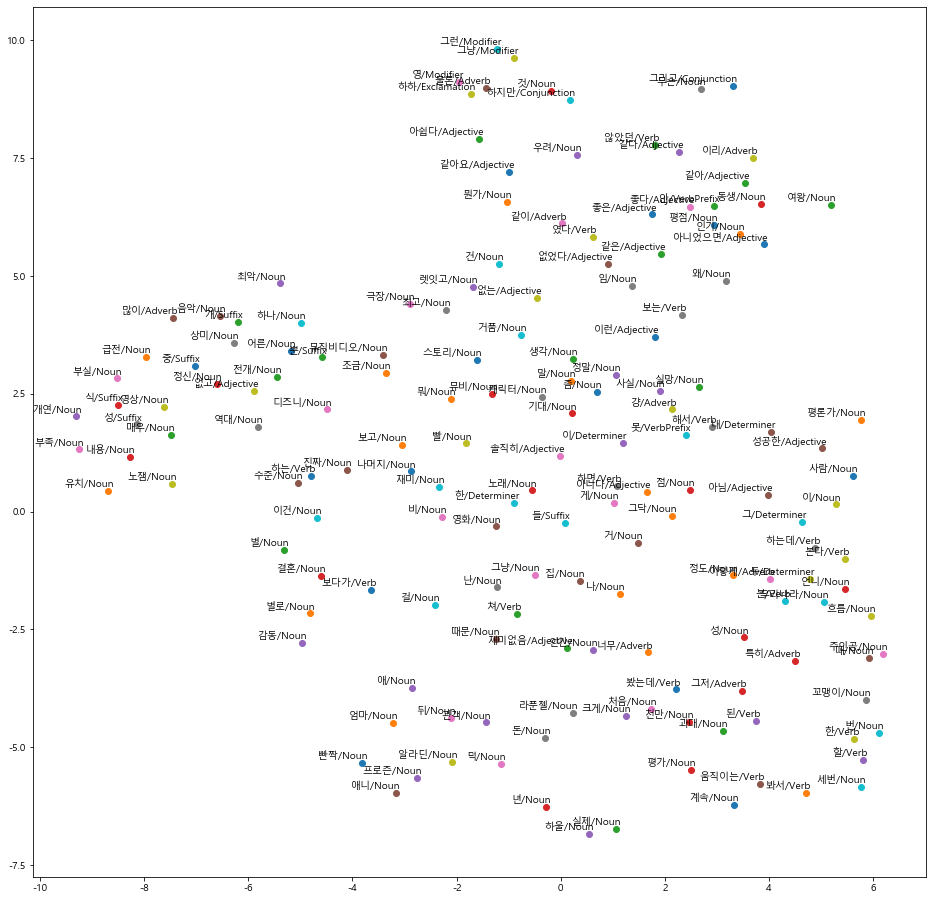

In [59]:
tsne_plot(model1_low) # 겨울왕국1의 낮은 평점 리뷰

# "내용, 개연, 부실, 부족" 등이 비슷한 위치에 등장한 것으로 보아 내용이 부실하다는 의견이 꽤 많은 것으로 보인다.
# 전개가 정신없다는 내용과 유치해서 노잼(?)인 사람도 있었던 것 같다.
# "기대, 실망, 좀" 이라는 단어가 같이 등장하는 것으로 보아 기대보다 실망했다는 리뷰도 꽤 보인다.

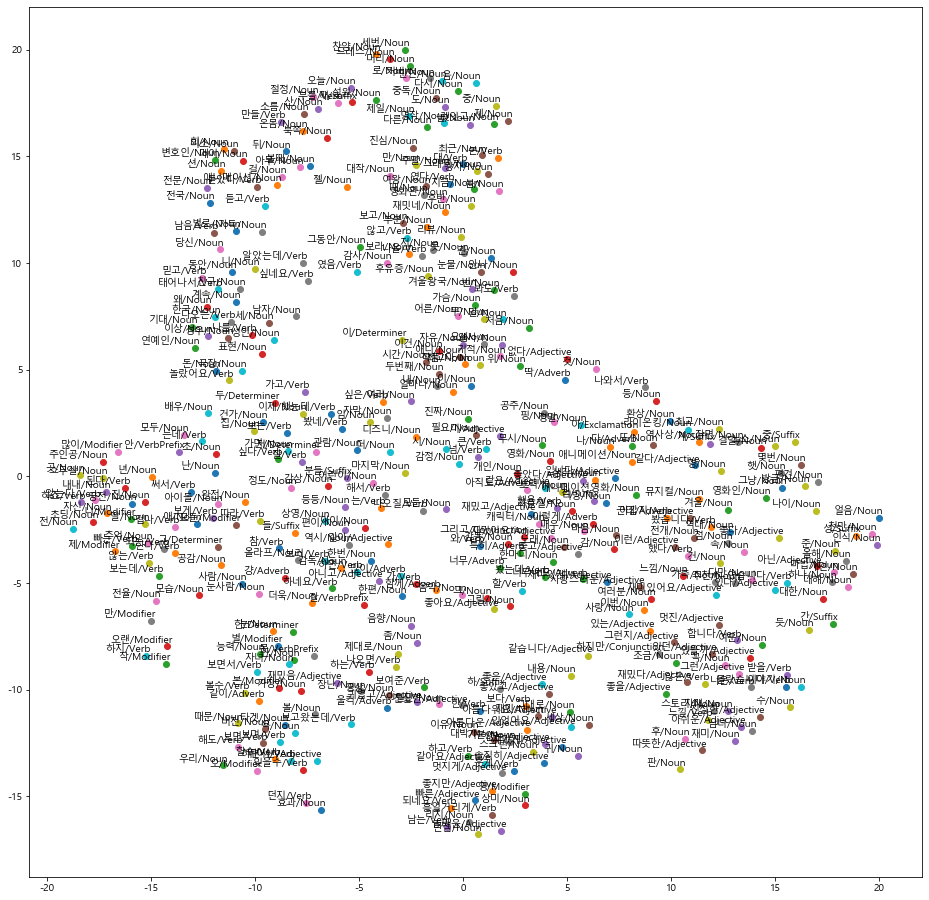

In [60]:
tsne_plot(model1_high) # 겨울왕국1의 높은 평점 리뷰
# "스크린, 아름다운, 대박, 소름, 멋지게" 등의 단어가 묶여 있는 것으로 보아 스크린에 대한 좋은 평가가 많았음을 알 수 있다.
# "캐릭터, 재밌고, 사랑스러운"이 같이 나타나는 것으로 보아 캐릭터에 대한 
# "북쪽, 산, 온몸, 소름 "이라는 단어가 함께 나타나고 있는데 이는 엘사가 주제가인 렛잇고를 부르는 장면으로 이 부분에서 소름이 돋은 사람이 평가도 돋보인다.
# "스토리, 아쉬운, 따뜻한, 재미" 에서 스토리를 따뜻하다, 재밌다고 평가하는 사람과 아쉽다고 평가하는 사람으로 갈리는 것을 알 수 있다.
# "노래, 좋다"가 함께 나타나는 것으로 보아 노래를 좋게 평가하고 있음을 알 수 있다.

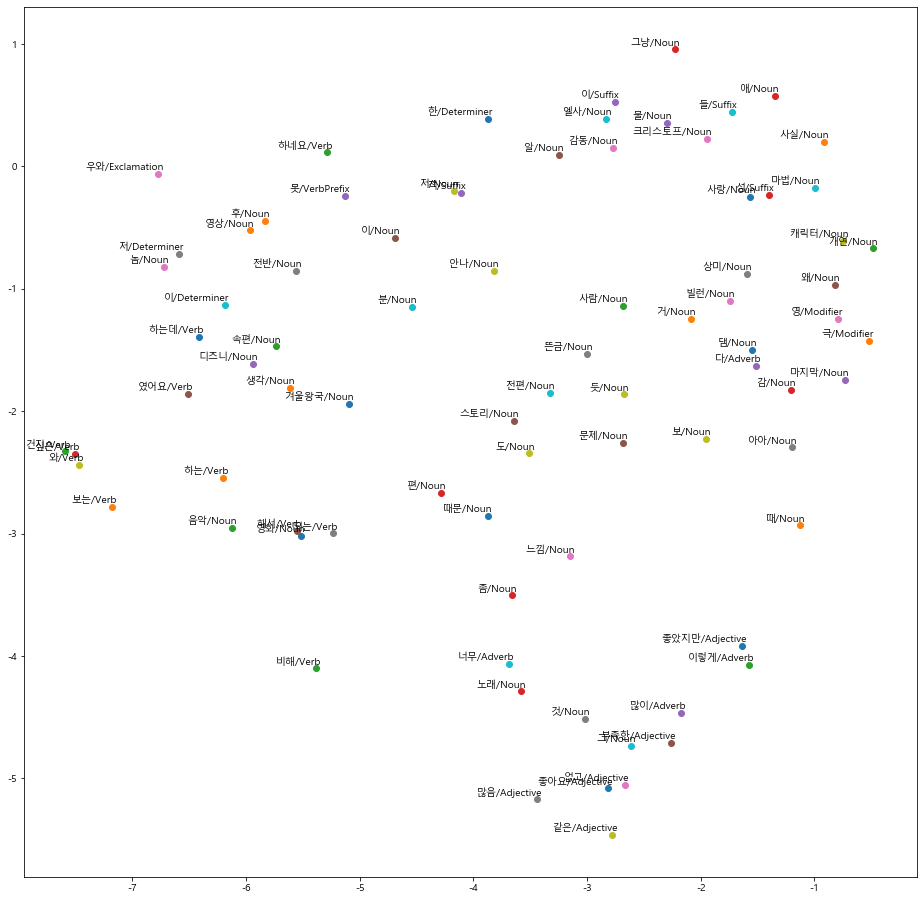

In [61]:
tsne_plot(model2_low) # 겨울왕국2의 낮은 평점 리뷰
# 속편, 전편이라는 단어가 나오는 것으로 보아 전과 비교하는 내용의 리뷰가 확실히 많음을 알 수 있다.
# 노래가 전보다 부족해서 아쉬운 사람도 꽤 있는 것 같다.

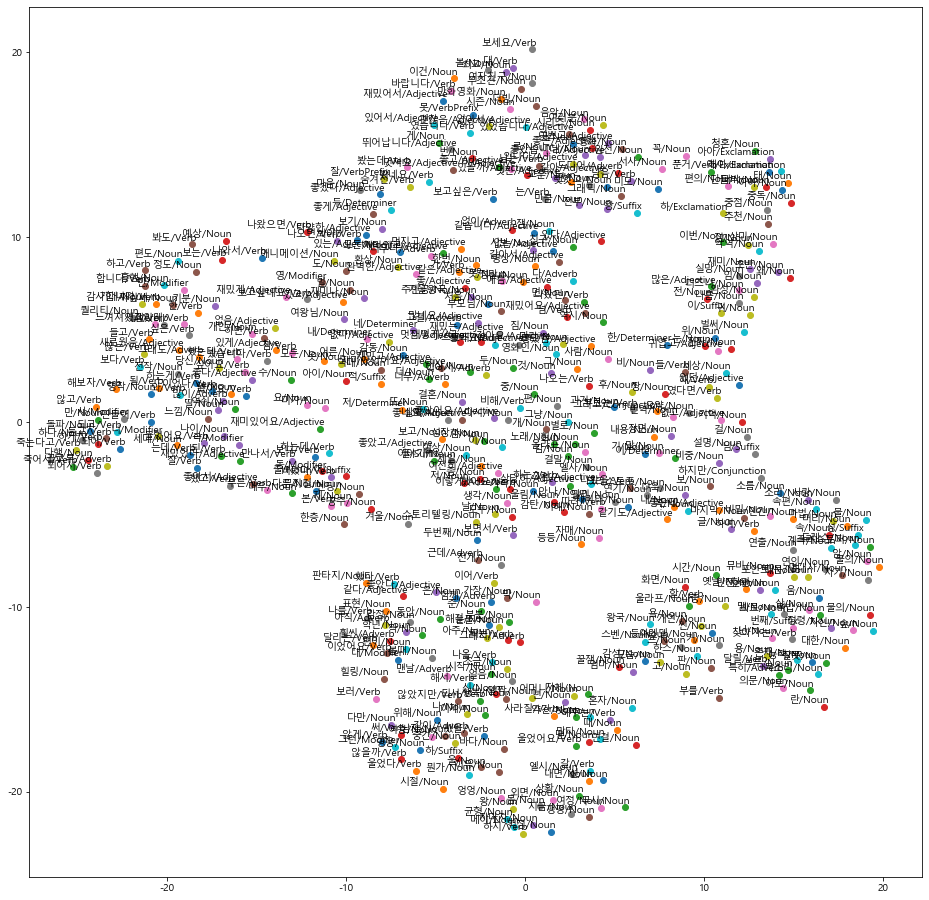

In [62]:
tsne_plot(model2_high) # 겨울왕국2의 높은 평점 리뷰
# 음악이 좋다는 평가와 별로라는 평가로 극명하게 갈리고 있음을 알 수 있다.
# 겨울왕국1에서는 아무래도 스토리에 대한 평가가 안좋았는데 겨울왕국2의 리뷰에서는 "스토리텔링, 감탄" 등의 단어가 함께 나타나는 것으로 보아 스토리에 대해 좋은 평가를 하고 있음을 알 수 있다.
# "퀄리티, 새로웠음", "그래픽, 미모, 멋진, 좋다"가 함께 나오는 것으로 보아 그래픽에 대해 높게 평가하고 있음을 알 수 있다.
# 울었다는 단어와, 엉엉, 엘사, 내면, 여정, 상황, 어머니 등이 함께 나타나는 것으로 보아 사람들이 어머니, 주인공의 내면과 관련된 장면에서 주로 많은 감동을 받은 것으로 보인다.